# Redes Neurais: Perceptron

Autor: Arthur Schneider Figueira

## Lendo as bibliotecas

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

## Exemplo: Breast Cancer (classificação)

### Leitura do banco de dados

In [3]:
# Carrega o conjunto de dados Breast Cancer Wisconsin
data = load_breast_cancer()
X = data.data
y = data.target

print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


### Divisão entre treino e teste

In [4]:
# Divide o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Padronização dos dados

In [5]:
# Pré-processamento dos dados: padronização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelo Perceptron

* 1 Camada com função de ativação sigmoid a qual recebe os inputs e retornará apenas 01 saída.

A figura abaixo ilustra a rede perceptron. Vale notar que há 30 "X" (X1 - X30) ao invés de X1, X2 e X3.

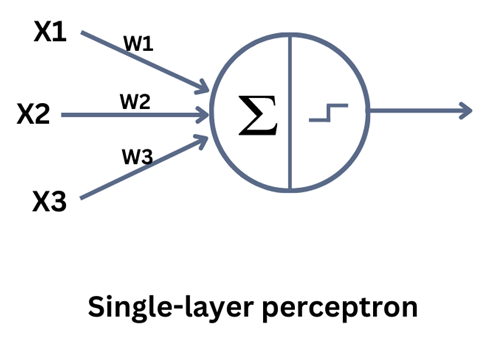

In [6]:
# Cria a estrutura da rede neural
model_class = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

### Resumo do modelo:

In [7]:
model_class.summary()
#31 parametros:
#30 "X" corresponde a 30 (W - pesos)
#1 Bias

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compila o modelo
# Após incluir as camadas da rede, precisamos compilar
model_class.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Treinamento do modelo

* Epoch: é a quantidade de vezes que a rede é treinada. Por exemplo, na 1a época, ela define os pesos (W) e Bias. Se o resultado não for bom, esses valores são corrigidos. Em outras palavras, é a maneira como a rede aprende e aperfeiçoa suas previsões.

* Batch Size: é a quantidade de amostras (linhas da tabela) que são treinadas por vez.  Por exemplo, len(X_train) = 455. Com o batch size de 32, temos 14.21 passagens. Na primeira, com 32 linhas, a segunda com 32 e assim sucessivamente. Ao chegar na 14, teremos 32 x 14 = 448 linhas que já passaram pela rede. Como o total é de 455, a última epoca será a 15, com um total de 455-448 = 7 linhas da tabela. Portanto, **na mesma epoca**. São usados todos os dados em batches para calcular os pesos (W) e bias.

* Verbose: se = 0, não trás prints na tela. Se = 1, mostra o avanço do modelo.

In [9]:
# Treina o modelo
model_class.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
15/15 [==============================] - 2s 7ms/step - loss: 0.4609 - accuracy: 0.8022
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4144 - accuracy: 0.8396
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3758 - accuracy: 0.8527
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3460 - accuracy: 0.8659
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3223 - accuracy: 0.8769
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3021 - accuracy: 0.8813
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.2861 - accuracy: 0.8879
Epoch 8/50
15/15 [==============================] - 0s 6ms/step - loss: 0.2714 - accuracy: 0.8945
Epoch 9/50
15/15 [==============================] - 0s 10ms/step - loss: 0.2588 - accuracy: 0.9011
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9011
Epoch 11/50
15/15 

### Preditos

In [10]:
# Faz as previsões no conjunto de teste
y_pred = model_class.predict(X_test).flatten()

4/4 [==============================] - 0s 5ms/step


In [11]:
previsao = lambda x: 1 if x > 0.5 else 0

x = 0.1
previsao(x)

0

In [12]:
preditos = [previsao(x) for x in list(y_pred)]

### Métrica na base de teste

In [13]:
# Calcula a acurácia das previsões
accuracy = accuracy_score(y_test, preditos)
print("Acurácia:", accuracy)

Acurácia: 0.9736842105263158


## Exemplo 2: tabuada de 2.

### Criando um banco de dados

In [14]:
X1,X2,y = [],[],[]
for x2 in range(1,101):
  x1 = 2
  result = x1*x2
  X1.append(x1)
  X2.append(x2)
  y.append(result)

In [15]:
tabuada_2 = pd.DataFrame.from_dict(data={"X1":X1,"X2":X2,"y":y})
tabuada_2.tail()

,X1,X2,y
95,2,96,192
96,2,97,194
97,2,98,196
98,2,99,198
99,2,100,200


In [16]:
X = tabuada_2[['X1','X2']]

### Criando um modelo

In [17]:
# Cria a estrutura da rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X.shape[1],))
])
model.summary()
#3 parametros:
#2 "X" corresponde a 2 (W - pesos)
#1 Bias

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compila o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treina o modelo: obs: se processar essa parte múltiplas vezes, o modelo continua de onde parou.
#Ex. 1a rodada: epoch 50, 2a rodada: epoch 51-100, ...
history = model.fit(np.array([[X1[i],X2[i]] for i in range(0,100)]), np.array(y), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
4/4 [==============================] - 1s 9ms/step - loss: 10003.5078
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 9954.9717
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 9906.3809
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 9858.7227
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 9808.7715
Epoch 6/50
4/4 [==============================] - 0s 7ms/step - loss: 9763.4365
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: 9716.6016
Epoch 8/50
4/4 [==============================] - 0s 11ms/step - loss: 9670.9775
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 9624.2812
Epoch 10/50
4/4 [==============================] - 0s 7ms/step - loss: 9577.3467
Epoch 11/50
4/4 [==============================] - 0s 7ms/step - loss: 9532.4521
Epoch 12/50
4/4 [==============================] - 0s 17ms/step - loss: 9484.9072
Epoch 13/50
4/4 [===============

### Visualizando o historico do erro

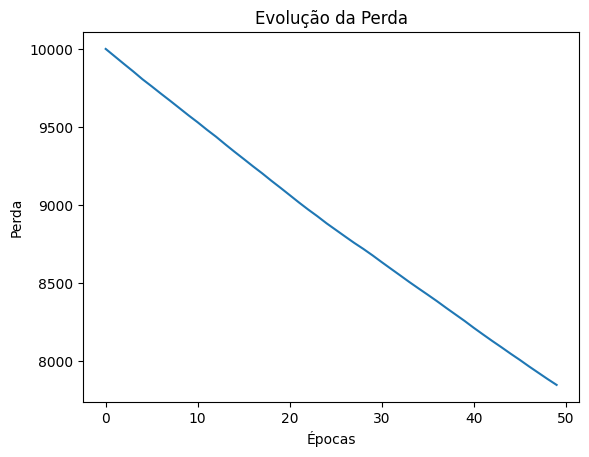

In [19]:
# Extrai os valores da perda (loss) do histórico do treinamento
loss_values = history.history['loss']

# Cria um gráfico com a evolução da perda ao longo das épocas
plt.plot(loss_values)
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

In [20]:
y_pred = model.predict(np.array([[X1[i],X2[i]] for i in range(0,100)])).flatten()
tabuada_2['Predito'] = y_pred
tabuada_2.tail(50)

4/4 [==============================] - 0s 4ms/step


,X1,X2,y,Predito
50,2,51,102,24.887177
51,2,52,104,25.341532
52,2,53,106,25.795885
53,2,54,108,26.250238
54,2,55,110,26.704594
55,2,56,112,27.158947
56,2,57,114,27.613300
57,2,58,116,28.067656
58,2,59,118,28.522009
59,2,60,120,28.976364


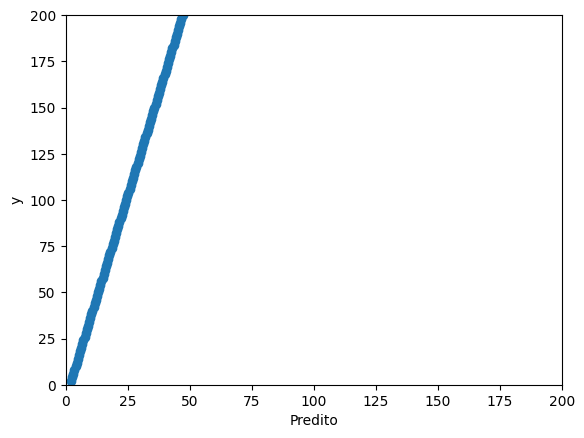

In [21]:
# Criação do gráfico de dispersão
plt.scatter(tabuada_2['Predito'], tabuada_2['y'])

# Configuração dos rótulos dos eixos
plt.xlabel('Predito')
plt.ylabel('y')

# Configuração da escala dos eixos
plt.xlim(0, 200)
plt.ylim(0, 200)

# Exibição do gráfico
plt.show()

### Conclusão exemplo 2:

* O erro está alto. O modelo não foi capaz de prever corretamente.

### Exemplo 3: ampliando as Epochs da Tabuada 2.

In [22]:
# Cria a estrutura da rede neural
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X.shape[1],))
])

In [23]:
# Compila o modelo
model2.compile(optimizer='adam', loss='mean_squared_error')

# Treina o modelo: obs: se processar essa parte múltiplas vezes, o modelo continua de onde parou.
#Ex. 1a rodada: epoch 50, 2a rodada: epoch 51-100, ...
history = model2.fit(np.array([[X1[i],X2[i]] for i in range(0,100)]), np.array(y), epochs=2000, batch_size=32, verbose=1)

Epoch 1/2000
4/4 [==============================] - 2s 7ms/step - loss: 33019.8125
Epoch 2/2000
4/4 [==============================] - 0s 10ms/step - loss: 32931.5469
Epoch 3/2000
4/4 [==============================] - 0s 9ms/step - loss: 32843.0859
Epoch 4/2000
4/4 [==============================] - 0s 7ms/step - loss: 32756.1953
Epoch 5/2000
4/4 [==============================] - 0s 7ms/step - loss: 32665.0449
Epoch 6/2000
4/4 [==============================] - 0s 8ms/step - loss: 32582.1094
Epoch 7/2000
4/4 [==============================] - 0s 11ms/step - loss: 32496.3633
Epoch 8/2000
4/4 [==============================] - 0s 12ms/step - loss: 32412.6621
Epoch 9/2000
4/4 [==============================] - 0s 11ms/step - loss: 32326.9043
Epoch 10/2000
4/4 [==============================] - 0s 11ms/step - loss: 32240.5684
Epoch 11/2000
4/4 [==============================] - 0s 7ms/step - loss: 32157.8301
Epoch 12/2000
4/4 [==============================] - 0s 7ms/step - loss: 32070.1

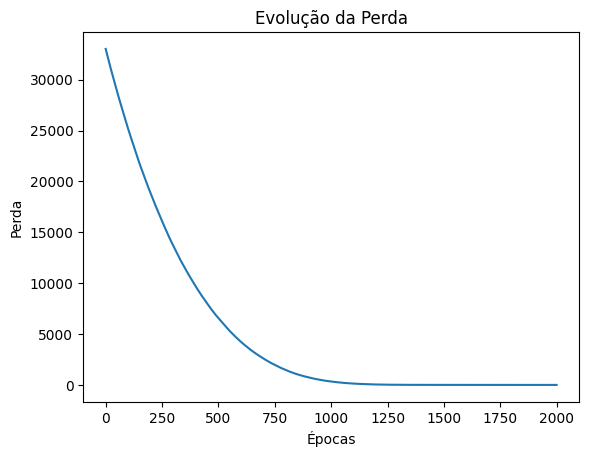

In [24]:
# Extrai os valores da perda (loss) do histórico do treinamento
loss_values = history.history['loss']

# Cria um gráfico com a evolução da perda ao longo das épocas
plt.plot(loss_values)
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

In [25]:
y_pred = model2.predict(np.array([[X1[i],X2[i]] for i in range(0,100)])).flatten()
tabuada_2['Predito2'] = y_pred
tabuada_2.tail()

4/4 [==============================] - 0s 4ms/step


,X1,X2,y,Predito,Predito2
95,2,96,192,45.333107,189.512344
96,2,97,194,45.787460,191.429794
97,2,98,196,46.241817,193.347229
98,2,99,198,46.696171,195.264679
99,2,100,200,47.150524,197.182114


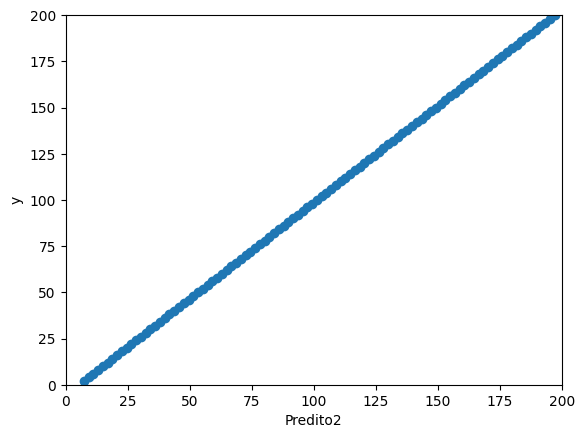

In [26]:
# Criação do gráfico de dispersão
plt.scatter(tabuada_2['Predito2'], tabuada_2['y'])

# Configuração dos rótulos dos eixos
plt.xlabel('Predito2')
plt.ylabel('y')

# Configuração da escala dos eixos
plt.xlim(0, 200)
plt.ylim(0, 200)

# Exibição do gráfico
plt.show()

In [27]:
print("Erro 50 Epochs:",mean_squared_error(y, tabuada_2['Predito'], squared=False))
print("Erro 2.000 Epochs:",mean_squared_error(y, tabuada_2['Predito2'], squared=False))

Erro 50 Epochs: 88.42198677667672
Erro 2.000 Epochs: 2.6997581107645536


### Calculando outros exemplos e conclusão exemplo 2

In [28]:
model2.predict(np.array([[2,200],[2,555],[100,2],[3,3],[5,5]])).flatten()
#O modelo é capaz de acertar a tabuada do 2 (ou se aproximar do resultado correto), mesmo para valores que não fizeram parte do treinamento.
#O modelo não acertou quando invertemos X1 e X2 de posição.
#Não foi capaz de acertar a tabuada do 3 e do 5

1/1 [==============================] - 0s 35ms/step


array([ 388.92642 , 1069.6187  ,  146.0999  ,   12.586332,   19.21361 ],
      dtype=float32)

In [29]:
model2.predict(np.reshape(np.array([2, 200]), (1, 2))).flatten()

1/1 [==============================] - 0s 50ms/step


array([388.92642], dtype=float32)

# Exercicios

1. Tabela de SOMA: treine uma rede neural capaz de resolver um problema de SOMA entre X1 e X2. A estrutura deverá ser de 2 entradas com um neurônio, o qual gera uma saída. X1 será um valor de 1 a 1000 e X2 um valor de 1 a 1000.

In [30]:
X1,X2,y = [],[],[]
for x1 in range(1,1001):
  for x2 in range(1,1001):
    result = x1+x2
    X1.append(x1)
    X2.append(x2)
    y.append(result)

tab_soma = pd.DataFrame.from_dict(data={"X1":X1,"X2":X2,"y":y})
tab_soma.tail()

,X1,X2,y
999995,1000,996,1996
999996,1000,997,1997
999997,1000,998,1998
999998,1000,999,1999
999999,1000,1000,2000


In [31]:
X_exemplo1 = tab_soma[['X1', 'X2']]

model_exemplo1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X_exemplo1.shape[1],))
])

model_exemplo1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_exemplo1.compile(optimizer='adam', loss='mean_squared_error')

In [51]:
history = model_exemplo1.fit(np.array([[X1[i],X2[i]] for i in range(0,1000000)]), np.array(y), epochs=50, batch_size=32000, verbose=1)

IndexError: ignored

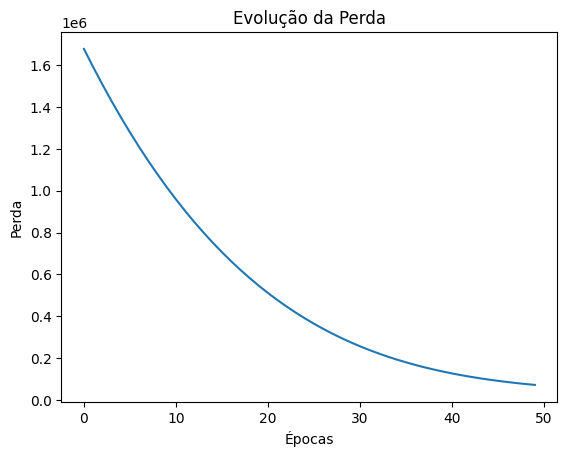

In [34]:
loss_values = history.history['loss']

plt.plot(loss_values)
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

In [35]:
y_pred = model_exemplo1.predict(np.array([[X1[i],X2[i]] for i in range(0,1000000)])).flatten()
tab_soma['Predito'] = y_pred
tab_soma.tail()

31250/31250 [==============================] - 49s 2ms/step


,X1,X2,y,Predito
999995,1000,996,1996,1684.471313
999996,1000,997,1997,1685.819946
999997,1000,998,1998,1687.168701
999998,1000,999,1999,1688.517334
999999,1000,1000,2000,1689.866089


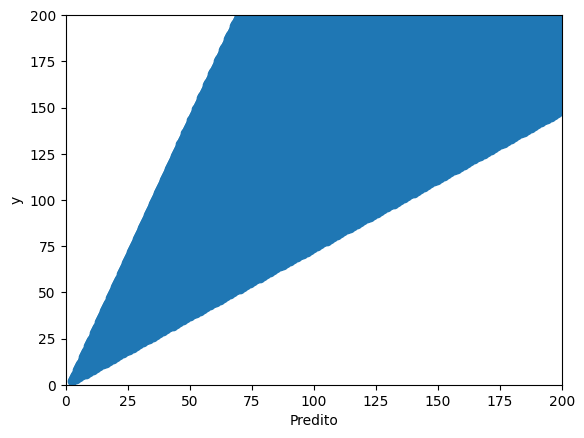

In [36]:

plt.scatter(tab_soma['Predito'], tab_soma['y'])
plt.xlabel('Predito')
plt.ylabel('y')

plt.xlim(0, 200)
plt.ylim(0, 200)

plt.show()

2. Tabela de Multiplicação variada: crie uma rede neural capaz de resolver um problema de multiplicação X1 e X2. X1 será de 1 a 10 e X2 será de 1 a 100. A estrutura deverá ser de 2 entrada com um neurônio e uma saída.

In [37]:
X1,X2,y = [],[],[]
for x1 in range(1,11):
  for x2 in range(1,101):
    result = x1*x2
    X1.append(x1)
    X2.append(x2)
    y.append(result)

tab_mult = pd.DataFrame.from_dict(data={"X1":X1,"X2":X2,"y":y})
tab_mult.tail()

,X1,X2,y
995,10,96,960
996,10,97,970
997,10,98,980
998,10,99,990
999,10,100,1000


In [38]:
X_exemplo2 = tab_mult[['X1', 'X2']]

model_exemplo2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X_exemplo2.shape[1],))
])

model_exemplo2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_exemplo2.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
history = model_exemplo2.fit(
    np.array([[X1[i],X2[i]] for i in range(0,1000)]), np.array(y), epochs=50, batch_size=32, verbose=1
)


Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 162530.6406
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 161042.6562
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 159557.3438
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 158063.8281
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 156625.9844
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 155167.2656
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 153743.4062
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 152324.8750
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 150912.8281
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 149531.1406
Epoch 11/50
32/32 [==============================] - 0s 2ms/step - loss: 148149.5312
Epoch 12/50
32/32 [==============================] - 0s 2ms/step - loss: 1

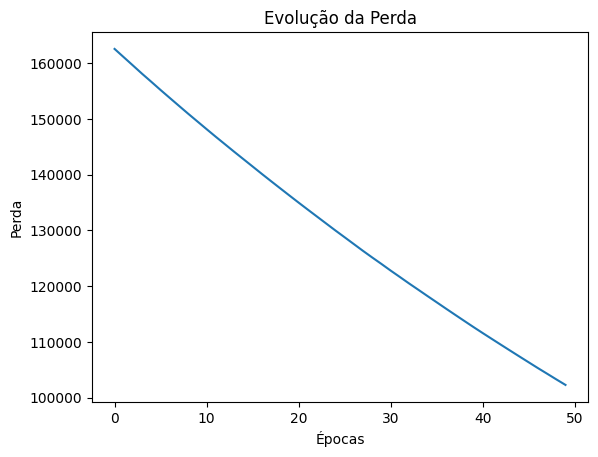

In [41]:

loss_values = history.history['loss']

plt.plot(loss_values)
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

In [42]:

y_pred = model_exemplo2.predict(np.array([[X1[i],X2[i]] for i in range(0,1000)])).flatten()
tab_mult['Predito'] = y_pred
tab_mult.tail()


32/32 [==============================] - 0s 2ms/step


,X1,X2,y,Predito
995,10,96,960,78.771164
996,10,97,970,79.547112
997,10,98,980,80.323059
998,10,99,990,81.099014
999,10,100,1000,81.874962


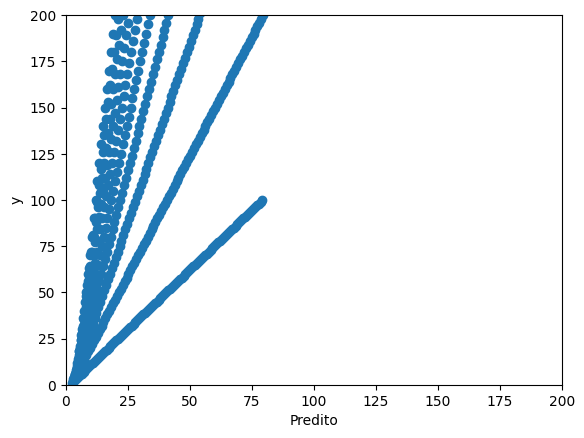

In [43]:

plt.scatter(tab_mult['Predito'], tab_mult['y'])


plt.xlabel('Predito')
plt.ylabel('y')

plt.xlim(0, 200)
plt.ylim(0, 200)

plt.show()

In [44]:
# Treinando melhor o modelo

In [45]:
X_exemplo2_V2 = tab_mult[['X1', 'X2']]

model_exemplo2_V2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X_exemplo2_V2.shape[1],))
])

model_exemplo2_V2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_exemplo2_V2.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
history = model_exemplo2_V2.fit(
    np.array([[X1[i],X2[i]] for i in range(0,1000)]), np.array(y), epochs=1500, batch_size=500, verbose=1
)


Epoch 1/1500
2/2 [==============================] - 1s 8ms/step - loss: 89860.7578
Epoch 2/1500
2/2 [==============================] - 0s 8ms/step - loss: 89795.8984
Epoch 3/1500
2/2 [==============================] - 0s 8ms/step - loss: 89731.9375
Epoch 4/1500
2/2 [==============================] - 0s 11ms/step - loss: 89665.3828
Epoch 5/1500
2/2 [==============================] - 0s 7ms/step - loss: 89602.7500
Epoch 6/1500
2/2 [==============================] - 0s 10ms/step - loss: 89537.4062
Epoch 7/1500
2/2 [==============================] - 0s 8ms/step - loss: 89472.9922
Epoch 8/1500
2/2 [==============================] - 0s 6ms/step - loss: 89409.3516
Epoch 9/1500
2/2 [==============================] - 0s 8ms/step - loss: 89344.0469
Epoch 10/1500
2/2 [==============================] - 0s 7ms/step - loss: 89280.2109
Epoch 11/1500
2/2 [==============================] - 0s 7ms/step - loss: 89215.9688
Epoch 12/1500
2/2 [==============================] - 0s 7ms/step - loss: 89150.9609

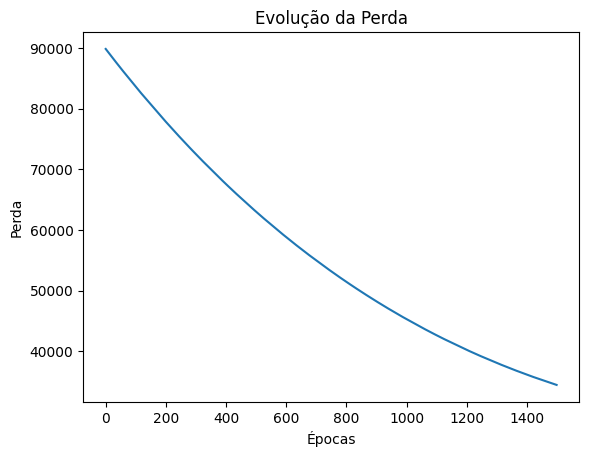

In [48]:
loss_values = history.history['loss']

plt.plot(loss_values)
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()


In [49]:

y_pred = model_exemplo2_V2.predict(np.array([[X1[i],X2[i]] for i in range(0,1000)])).flatten()
tab_mult['Predito_V2'] = y_pred
tab_mult.tail()


32/32 [==============================] - 0s 3ms/step


,X1,X2,y,Predito,Predito_V2
995,10,96,960,78.771164,385.896851
996,10,97,970,79.547112,389.747925
997,10,98,980,80.323059,393.598999
998,10,99,990,81.099014,397.450104
999,10,100,1000,81.874962,401.301178


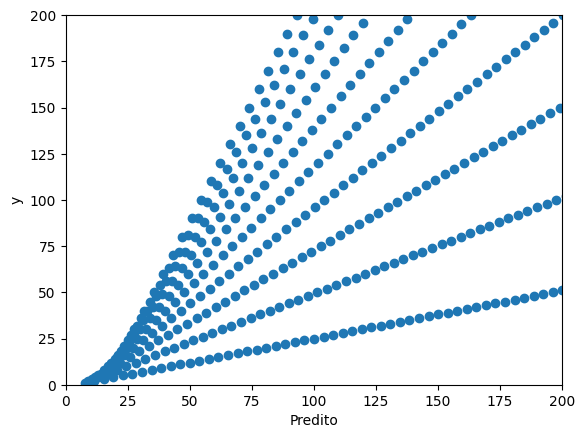

In [50]:
plt.scatter(tab_mult['Predito_V2'], tab_mult['y'])


plt.xlabel('Predito')
plt.ylabel('y')

plt.xlim(0, 200)
plt.ylim(0, 200)

plt.show()

In [ ]:
# Ambos treinamentos não foram bons, os erros continuam altos